# Part-1

## 1. Step: Importing the dataset

## 2. Step: Addressing PII data

## 3. Step: Creating a regional segmentation and determining the spending habits

## 4. Step: Filtering the low activity customers

## 5. Step: Analysing the data

## 6. Step: Visualisation

## 7. Step: Aggregation

## 8. Step: Comparing the customer profiles with regions and departments

## 1. Step

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os

In [2]:
path=r'C:\Users\Günay\Documents\Instacart Basket Analysis'

In [3]:
df=pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'ord_prods_cust_merged.pkl'))

In [4]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,Surnam,gender,state,age,date_joined,n_dependants,fam_status,income
0,1501582.0,2.0,prior,2.0,5.0,10.0,10.0,8479.0,3.0,0.0,...,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0
1,1501582.0,2.0,prior,2.0,5.0,10.0,10.0,47766.0,4.0,1.0,...,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0
2,1501582.0,2.0,prior,2.0,5.0,10.0,10.0,19051.0,5.0,0.0,...,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0
3,1901567.0,2.0,prior,3.0,1.0,10.0,3.0,20574.0,3.0,1.0,...,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0
4,1901567.0,2.0,prior,3.0,1.0,10.0,3.0,7781.0,4.0,0.0,...,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0


In [5]:
df.shape

(2133599, 37)

## 2. Step

In [6]:
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_time', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'split', '_merge', 'product_name',
       'aisle_id', 'department_id', 'prices', 'exists', 'price_range',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'days_median', 'frequency_flag', 'first_name',
       'Surnam', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income'],
      dtype='object')

In [7]:
# PII Data at dataset are "first_name" and "surname". 

## 3. Step - a

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,split,_merge,product_name,aisle_id,department_id,prices,exists,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,days_median,frequency_flag,first_name,Surnam,gender,state,age,date_joined,n_dependants,fam_status,income
0,1501582.0,2.0,prior,2.0,5.0,10.0,10.0,8479.0,3.0,0.0,19.0,both,Original Black Box Tablewater Cracker,78.0,19.0,3.5,both,Low-range product,Low-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0
1,1501582.0,2.0,prior,2.0,5.0,10.0,10.0,47766.0,4.0,1.0,12.0,both,Organic Avocado,24.0,4.0,6.3,both,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0
2,1501582.0,2.0,prior,2.0,5.0,10.0,10.0,19051.0,5.0,0.0,20.0,both,"Pita Chips, Simply Naked, Party Size",107.0,19.0,3.9,both,Low-range product,Low-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0
3,1901567.0,2.0,prior,3.0,1.0,10.0,3.0,20574.0,3.0,1.0,16.0,both,Roasted Turkey,96.0,20.0,2.3,both,Low-range product,Low-range product,Regularly busy,Busiest days,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0
4,1901567.0,2.0,prior,3.0,1.0,10.0,3.0,7781.0,4.0,0.0,1.0,both,Organic Sticks Low Moisture Part Skim Mozzarel...,21.0,16.0,6.6,both,Mid-range product,Mid-range product,Regularly busy,Busiest days,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0


In [10]:
df['state'].value_counts(dropna=False)

Pennsylvania            45268
Missouri                43770
Georgia                 43770
California              43678
Rhode Island            43649
Kansas                  43606
New York                43055
Louisiana               43001
Alabama                 42989
South Dakota            42980
South Carolina          42970
Massachusetts           42895
Virginia                42734
Arkansas                42541
Arizona                 42443
North Carolina          42349
Illinois                42284
Minnesota               42227
Colorado                42181
Wyoming                 42108
Oklahoma                41879
Michigan                41820
Alaska                  41812
Washington              41775
Oregon                  41760
District of Columbia    41480
Tennessee               41445
Florida                 41418
Hawaii                  41390
New Mexico              41371
New Jersey              41247
Maine                   41202
Maryland                40891
Kentucky  

In [11]:
# I wanted to see if there is any typo at state names. There isn`t any typo. 
# Besides, there are 10119 missing values at state column. 

In [12]:
def region(row):
    if row['state'] == 'Pennsylvania':
        return 'Northeast'
    elif row['state'] == 'Missouri':
        return 'Midwest'
    elif row['state'] == 'Georgia':
        return 'South'
    elif row['state'] == 'California':
        return 'West'
    elif row['state'] == 'Rhode Island':
        return 'Northeast'
    elif row['state'] == 'Kansas':
        return 'Midwest'
    elif row['state'] == 'New York':
        return 'Northeast'
    elif row['state'] == 'Louisiana':
        return 'South'
    elif row['state'] == 'Alabama':
        return 'South'
    elif row['state'] == 'South Dakota':
        return 'Midwest'
    elif row['state'] == 'South Carolina':
        return 'South'
    elif row['state'] == 'Massachusetts':
        return 'Northeast'
    elif row['state'] == 'Virginia':
        return 'South'
    elif row['state'] == 'Arkansas':
        return 'South'
    elif row['state'] == 'Arizona':
        return 'West'
    elif row['state'] == 'North Carolina':
        return 'South'
    elif row['state'] == 'Illinois':
        return 'Midwest'
    elif row['state'] == 'Minnesota':
        return 'Midwest'
    elif row['state'] == 'Colorado':
        return 'West'
    elif row['state'] == 'Wyoming':
        return 'West'
    elif row['state'] == 'Oklahoma':
        return 'South'
    elif row['state'] == 'Michigan':
        return 'Midwest'
    elif row['state'] == 'Alaska':
        return 'West'
    elif row['state'] == 'Washington':
        return 'West'
    elif row['state'] == 'Oregon':
        return 'West'
    elif row['state'] == 'District of Columbia':
        return 'South'
    elif row['state'] == 'Tennessee':
        return 'South'
    elif row['state'] == 'Florida':
        return 'South'
    elif row['state'] == 'Hawaii':
        return 'West'
    elif row['state'] == 'New Mexico':
        return 'West'
    elif row['state'] == 'New Jersey':
        return 'Northeast'
    elif row['state'] == 'Maine':
        return 'Northeast'
    elif row['state'] == 'Maryland':
        return 'South'
    elif row['state'] == 'Kentucky':
        return 'South'
    elif row['state'] == 'North Dakota':
        return 'Midwest'
    elif row['state'] == 'Mississippi':
        return 'South'
    elif row['state'] == 'Delaware':
        return 'South'
    elif row['state'] == 'Vermont':
        return 'Northeast'
    elif row['state'] == 'Montana':
        return 'West'
    elif row['state'] == 'Connecticut':
        return 'Northeast'
    elif row['state'] == 'Ohio':
        return 'Midwest'
    elif row['state'] == 'West Virginia':
        return 'South'
    elif row['state'] == 'Wisconsin':
        return 'Midwest'
    elif row['state'] == 'Iowa':
        return 'Midwest'
    elif row['state'] == 'Indiana':
        return 'Midwest'
    elif row['state'] == 'Nevada':
        return 'West'
    elif row['state'] == 'Utah':
        return 'West'
    elif row['state'] == 'Idaho':
        return 'West'
    elif row['state'] == 'Nebraska':
        return 'Midwest'
    elif row['state'] == 'New Hampshire':
        return 'Northeast'
    elif row['state'] == 'Texas':
        return 'South'
    else: return 'Not enough data'

In [13]:
# Apply the function

In [14]:
df['region'] = df.apply(region, axis=1)

In [15]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,split,_merge,product_name,aisle_id,department_id,prices,exists,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,days_median,frequency_flag,first_name,Surnam,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,1501582.0,2.0,prior,2.0,5.0,10.0,10.0,8479.0,3.0,0.0,19.0,both,Original Black Box Tablewater Cracker,78.0,19.0,3.5,both,Low-range product,Low-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West
1,1501582.0,2.0,prior,2.0,5.0,10.0,10.0,47766.0,4.0,1.0,12.0,both,Organic Avocado,24.0,4.0,6.3,both,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West
2,1501582.0,2.0,prior,2.0,5.0,10.0,10.0,19051.0,5.0,0.0,20.0,both,"Pita Chips, Simply Naked, Party Size",107.0,19.0,3.9,both,Low-range product,Low-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West
3,1901567.0,2.0,prior,3.0,1.0,10.0,3.0,20574.0,3.0,1.0,16.0,both,Roasted Turkey,96.0,20.0,2.3,both,Low-range product,Low-range product,Regularly busy,Busiest days,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West
4,1901567.0,2.0,prior,3.0,1.0,10.0,3.0,7781.0,4.0,0.0,1.0,both,Organic Sticks Low Moisture Part Skim Mozzarel...,21.0,16.0,6.6,both,Mid-range product,Mid-range product,Regularly busy,Busiest days,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West


In [16]:
df['region'].value_counts(dropna=False)

South              709253
West               538644
Midwest            497890
Northeast          377693
Not enough data     10119
Name: region, dtype: int64

## 3. Step - b

In [17]:
df['spending_flag'].value_counts(dropna=False)

Low spender     1932708
NaN              150502
High spender      50389
Name: spending_flag, dtype: int64

In [18]:
def spending_habit(row):

  if (row['spending_flag'] == 'Low spender') and (row['region'] == 'West'):
    return 'Low spender_West'
  elif (row['spending_flag'] == 'High spender') and (row['region'] == 'West'):
    return 'High spender_West'
  elif (row['spending_flag'] == 'Low spender') and (row['region'] == 'South'):
    return 'Low spender_South'
  elif (row['spending_flag'] == 'High spender') and (row['region'] == 'South'):
    return 'High spender_South'
  elif (row['spending_flag'] == 'Low spender') and (row['region'] == 'Midwest'):
    return 'Low spender_Midwest'
  elif (row['spending_flag'] == 'High spender') and (row['region'] == 'Midwest'):
    return 'High spender_Midwest'
  elif (row['spending_flag'] == 'Low spender') and (row['region'] == 'Northeast'):
    return 'Low spender_Northeast'
  elif (row['spending_flag'] == 'High spender') and (row['region'] == 'Northeast'):
    return 'High spender_Northeast'
  else: return 'Not enough data'

In [19]:
df['spending_habit'] = df.apply(spending_habit, axis=1)

In [20]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,split,_merge,product_name,aisle_id,department_id,prices,exists,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,days_median,frequency_flag,first_name,Surnam,gender,state,age,date_joined,n_dependants,fam_status,income,region,spending_habit
0,1501582.0,2.0,prior,2.0,5.0,10.0,10.0,8479.0,3.0,0.0,19.0,both,Original Black Box Tablewater Cracker,78.0,19.0,3.5,both,Low-range product,Low-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West
1,1501582.0,2.0,prior,2.0,5.0,10.0,10.0,47766.0,4.0,1.0,12.0,both,Organic Avocado,24.0,4.0,6.3,both,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West
2,1501582.0,2.0,prior,2.0,5.0,10.0,10.0,19051.0,5.0,0.0,20.0,both,"Pita Chips, Simply Naked, Party Size",107.0,19.0,3.9,both,Low-range product,Low-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West
3,1901567.0,2.0,prior,3.0,1.0,10.0,3.0,20574.0,3.0,1.0,16.0,both,Roasted Turkey,96.0,20.0,2.3,both,Low-range product,Low-range product,Regularly busy,Busiest days,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West
4,1901567.0,2.0,prior,3.0,1.0,10.0,3.0,7781.0,4.0,0.0,1.0,both,Organic Sticks Low Moisture Part Skim Mozzarel...,21.0,16.0,6.6,both,Mid-range product,Mid-range product,Regularly busy,Busiest days,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West


In [21]:
df['spending_habit'].value_counts(dropna=False)

Low spender_South         645284
Low spender_West          490216
Low spender_Midwest       453202
Low spender_Northeast     344006
Not enough data           150502
High spender_South         17191
High spender_West          12624
High spender_Midwest       11674
High spender_Northeast      8900
Name: spending_habit, dtype: int64

In [22]:
# There isn`t any difference in spending habits between the regions. 
# 97% of the customers are low spender and 3% of them are high spender in all regions.
# Besides, there are 150502 missing value at spending habit column. 

## 4. Step

In [23]:
df['order_number'].value_counts(dropna=False)

NaN     150501
3.0     134361
2.0     133502
4.0     118553
5.0     106689
         ...  
94.0       931
98.0       859
97.0       849
96.0       847
99.0       840
Name: order_number, Length: 99, dtype: int64

In [24]:
def activity(row):
    if row['order_number'] < 5:
        return 'Low activity'
    elif row['order_number'] >= 5:
        return 'High activity'
    else: return 'Not enough data'

In [25]:
df['activity'] = df.apply(activity, axis=1)

In [26]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,split,_merge,product_name,aisle_id,department_id,prices,exists,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,days_median,frequency_flag,first_name,Surnam,gender,state,age,date_joined,n_dependants,fam_status,income,region,spending_habit,activity
0,1501582.0,2.0,prior,2.0,5.0,10.0,10.0,8479.0,3.0,0.0,19.0,both,Original Black Box Tablewater Cracker,78.0,19.0,3.5,both,Low-range product,Low-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,Low activity
1,1501582.0,2.0,prior,2.0,5.0,10.0,10.0,47766.0,4.0,1.0,12.0,both,Organic Avocado,24.0,4.0,6.3,both,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,Low activity
2,1501582.0,2.0,prior,2.0,5.0,10.0,10.0,19051.0,5.0,0.0,20.0,both,"Pita Chips, Simply Naked, Party Size",107.0,19.0,3.9,both,Low-range product,Low-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,Low activity
3,1901567.0,2.0,prior,3.0,1.0,10.0,3.0,20574.0,3.0,1.0,16.0,both,Roasted Turkey,96.0,20.0,2.3,both,Low-range product,Low-range product,Regularly busy,Busiest days,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,Low activity
4,1901567.0,2.0,prior,3.0,1.0,10.0,3.0,7781.0,4.0,0.0,1.0,both,Organic Sticks Low Moisture Part Skim Mozzarel...,21.0,16.0,6.6,both,Mid-range product,Mid-range product,Regularly busy,Busiest days,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,Low activity


In [27]:
df['activity'].value_counts(dropna=False)

High activity      1596682
Low activity        386416
Not enough data     150501
Name: activity, dtype: int64

In [28]:
df['activity'] == 'Low activity'

0           True
1           True
2           True
3           True
4           True
           ...  
2133594    False
2133595    False
2133596    False
2133597    False
2133598    False
Name: activity, Length: 2133599, dtype: bool

In [29]:
df[df['activity'] == 'Low activity']

,order_id,user_id,eval_set,order_number,order_dow,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,split,_merge,product_name,aisle_id,department_id,prices,exists,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,days_median,frequency_flag,first_name,Surnam,gender,state,age,date_joined,n_dependants,fam_status,income,region,spending_habit,activity
0,1501582.0,2.0,prior,2.0,5.0,10.0,10.0,8479.0,3.0,0.0,19.0,both,Original Black Box Tablewater Cracker,78.0,19.0,3.5,both,Low-range product,Low-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,Low activity
1,1501582.0,2.0,prior,2.0,5.0,10.0,10.0,47766.0,4.0,1.0,12.0,both,Organic Avocado,24.0,4.0,6.3,both,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,Low activity
2,1501582.0,2.0,prior,2.0,5.0,10.0,10.0,19051.0,5.0,0.0,20.0,both,"Pita Chips, Simply Naked, Party Size",107.0,19.0,3.9,both,Low-range product,Low-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,Low activity
3,1901567.0,2.0,prior,3.0,1.0,10.0,3.0,20574.0,3.0,1.0,16.0,both,Roasted Turkey,96.0,20.0,2.3,both,Low-range product,Low-range product,Regularly busy,Busiest days,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,Low activity
4,1901567.0,2.0,prior,3.0,1.0,10.0,3.0,7781.0,4.0,0.0,1.0,both,Organic Sticks Low Moisture Part Skim Mozzarel...,21.0,16.0,6.6,both,Mid-range product,Mid-range product,Regularly busy,Busiest days,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,Low activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983093,676378.0,60185.0,prior,2.0,4.0,9.0,2.0,21094.0,6.0,0.0,14.0,both,"Plastic Bubble Mailer 6\"" x 9.25\""",6.0,2.0,7.5,both,Mid-range product,Mid-range product,Least busy,Least busy,Most orders,2.0,New customer,7.500000,Low spender,2.0,Frequent customer,Patrick,Fowler,Male,California,79.0,1/6/2018,0.0,divorced/widowed,34728.0,West,Low spender_West,Low activity
1983094,932420.0,60880.0,prior,2.0,4.0,21.0,30.0,30075.0,9.0,0.0,20.0,both,Whatever Messy Look Paste,22.0,11.0,13.5,both,Mid-range product,Mid-range product,Least busy,Least busy,Average orders,2.0,New customer,13.500000,High spender,30.0,Non-frequent customer,Jennifer,Horton,Female,Mississippi,70.0,11/22/2019,0.0,divorced/widowed,162709.0,South,High spender_South,Low activity
1983095,3288689.0,62074.0,prior,3.0,0.0,1.0,1.0,43537.0,1.0,0.0,8.0,both,Hot Paprika,104.0,13.0,8.8,both,Mid-range product,Mid-range product,Busiest day,Busiest days,Fewest orders,3.0,New customer,8.800000,Low spender,1.0,Frequent customer,NaN,Parks,Male,Connecticut,32.0,11/1/2018,3.0,married,69939.0,Northeast,Low spender_Northeast,Low activity
1983096,1752402.0,62363.0,prior,2.0,3.0,8.0,17.0,49214.0,7.0,0.0,4.0,both,Kids Broad Spectrum Sunblock Lotion Spf 50,102.0,18.0,11.3,both,Mid-range product,Mid-range product,Regularly busy,Least busy,Average orders,2.0,New customer,11.300000,High spender,17.0,Regular customer,Jeremy,Taylor,Male,South Carolina,38.0,11/14/2017,1.0,married,79308.0,South,High spender_South,Low activity


In [30]:
df_low_activity_customer=df[df['activity'] == 'Low activity']

In [31]:
df_low_activity_customer.shape

(386416, 40)

In [32]:
df_low_activity_customer.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customer.pkl'))

In [33]:
# I created a new flag column for the activity and then exported the data of the customers with low activity as a subset.
# But actually I could do that by filtering order_number column too. 
# I will export dataset of only customers which have more than 5 order by filtering order_number column. 

In [34]:
df[df['order_number'] >= 5]

,order_id,user_id,eval_set,order_number,order_dow,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,split,_merge,product_name,aisle_id,department_id,prices,exists,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,days_median,frequency_flag,first_name,Surnam,gender,state,age,date_joined,n_dependants,fam_status,income,region,spending_habit,activity
5,1718559.0,2.0,prior,9.0,2.0,9.0,8.0,7781.0,6.0,1.0,18.0,both,Organic Sticks Low Moisture Part Skim Mozzarel...,21.0,16.0,6.6,both,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,High activity
11,1673511.0,2.0,prior,5.0,3.0,11.0,8.0,5322.0,2.0,0.0,1.0,both,Gluten Free Dark Chocolate Chunk Chewy with a ...,3.0,19.0,2.9,both,Low-range product,Low-range product,Regularly busy,Least busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,High activity
12,1199898.0,2.0,prior,6.0,2.0,9.0,13.0,27344.0,6.0,1.0,1.0,both,Uncured Genoa Salami,96.0,20.0,14.8,both,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,High activity
13,1199898.0,2.0,prior,6.0,2.0,9.0,13.0,46676.0,12.0,0.0,16.0,both,Total 0% Nonfat Greek Yogurt,120.0,16.0,5.7,both,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,High activity
14,3194192.0,2.0,prior,7.0,2.0,12.0,14.0,24852.0,8.0,1.0,2.0,both,Banana,24.0,4.0,12.3,both,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,High activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983068,1606377.0,55635.0,prior,5.0,1.0,12.0,8.0,39873.0,1.0,1.0,1.0,both,Purrin' Beef Recipe Cat food,41.0,8.0,6.6,both,Mid-range product,Mid-range product,Regularly busy,Busiest days,Most orders,5.0,New customer,5.400000,Low spender,8.0,Frequent customer,Pamela,Lara,Female,Utah,53.0,2/23/2017,0.0,single,104881.0,West,Low spender_West,High activity
1983079,717037.0,46178.0,prior,7.0,2.0,11.0,28.0,48184.0,1.0,1.0,12.0,both,Soy Curls,107.0,19.0,4.4,both,Low-range product,Low-range product,Regularly busy,Regularly busy,Most orders,13.0,Regular customer,4.400000,Low spender,21.5,Non-frequent customer,Sara,Barrera,Female,Nevada,72.0,3/19/2020,0.0,divorced/widowed,41070.0,West,Low spender_West,High activity
1983080,262146.0,46178.0,prior,8.0,2.0,12.0,7.0,48184.0,1.0,1.0,3.0,both,Soy Curls,107.0,19.0,4.4,both,Low-range product,Low-range product,Regularly busy,Regularly busy,Most orders,13.0,Regular customer,4.400000,Low spender,21.5,Non-frequent customer,Sara,Barrera,Female,Nevada,72.0,3/19/2020,0.0,divorced/widowed,41070.0,West,Low spender_West,High activity
1983081,3077773.0,46178.0,prior,13.0,1.0,15.0,28.0,48184.0,1.0,1.0,15.0,both,Soy Curls,107.0,19.0,4.4,both,Low-range product,Low-range product,Regularly busy,Busiest days,Most orders,13.0,Regular customer,4.400000,Low spender,21.5,Non-frequent customer,Sara,Barrera,Female,Nevada,72.0,3/19/2020,0.0,divorced/widowed,41070.0,West,Low spender_West,High activity


In [35]:
df_high_activity_customer=df[df['order_number'] >= 5]

In [36]:
df_high_activity_customer

,order_id,user_id,eval_set,order_number,order_dow,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,split,_merge,product_name,aisle_id,department_id,prices,exists,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,days_median,frequency_flag,first_name,Surnam,gender,state,age,date_joined,n_dependants,fam_status,income,region,spending_habit,activity
5,1718559.0,2.0,prior,9.0,2.0,9.0,8.0,7781.0,6.0,1.0,18.0,both,Organic Sticks Low Moisture Part Skim Mozzarel...,21.0,16.0,6.6,both,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,High activity
11,1673511.0,2.0,prior,5.0,3.0,11.0,8.0,5322.0,2.0,0.0,1.0,both,Gluten Free Dark Chocolate Chunk Chewy with a ...,3.0,19.0,2.9,both,Low-range product,Low-range product,Regularly busy,Least busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,High activity
12,1199898.0,2.0,prior,6.0,2.0,9.0,13.0,27344.0,6.0,1.0,1.0,both,Uncured Genoa Salami,96.0,20.0,14.8,both,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,High activity
13,1199898.0,2.0,prior,6.0,2.0,9.0,13.0,46676.0,12.0,0.0,16.0,both,Total 0% Nonfat Greek Yogurt,120.0,16.0,5.7,both,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,High activity
14,3194192.0,2.0,prior,7.0,2.0,12.0,14.0,24852.0,8.0,1.0,2.0,both,Banana,24.0,4.0,12.3,both,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,14.0,Regular customer,8.306667,Low spender,10.0,Frequent customer,Norma,Chapman,Female,Alaska,68.0,7/4/2017,3.0,married,64940.0,West,Low spender_West,High activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983068,1606377.0,55635.0,prior,5.0,1.0,12.0,8.0,39873.0,1.0,1.0,1.0,both,Purrin' Beef Recipe Cat food,41.0,8.0,6.6,both,Mid-range product,Mid-range product,Regularly busy,Busiest days,Most orders,5.0,New customer,5.400000,Low spender,8.0,Frequent customer,Pamela,Lara,Female,Utah,53.0,2/23/2017,0.0,single,104881.0,West,Low spender_West,High activity
1983079,717037.0,46178.0,prior,7.0,2.0,11.0,28.0,48184.0,1.0,1.0,12.0,both,Soy Curls,107.0,19.0,4.4,both,Low-range product,Low-range product,Regularly busy,Regularly busy,Most orders,13.0,Regular customer,4.400000,Low spender,21.5,Non-frequent customer,Sara,Barrera,Female,Nevada,72.0,3/19/2020,0.0,divorced/widowed,41070.0,West,Low spender_West,High activity
1983080,262146.0,46178.0,prior,8.0,2.0,12.0,7.0,48184.0,1.0,1.0,3.0,both,Soy Curls,107.0,19.0,4.4,both,Low-range product,Low-range product,Regularly busy,Regularly busy,Most orders,13.0,Regular customer,4.400000,Low spender,21.5,Non-frequent customer,Sara,Barrera,Female,Nevada,72.0,3/19/2020,0.0,divorced/widowed,41070.0,West,Low spender_West,High activity
1983081,3077773.0,46178.0,prior,13.0,1.0,15.0,28.0,48184.0,1.0,1.0,15.0,both,Soy Curls,107.0,19.0,4.4,both,Low-range product,Low-range product,Regularly busy,Busiest days,Most orders,13.0,Regular customer,4.400000,Low spender,21.5,Non-frequent customer,Sara,Barrera,Female,Nevada,72.0,3/19/2020,0.0,divorced/widowed,41070.0,West,Low spender_West,High activity


In [37]:
df_high_activity_customer.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ord_prods_cust_merged_highact.pkl'))

## 5. Step

In [38]:
df_high_activity_customer['department_id'].value_counts(dropna=False)

4.0     473366
16.0    267631
19.0    142983
7.0     133638
1.0     105596
13.0     90732
3.0      57271
15.0     51780
20.0     51599
9.0      41385
17.0     35408
14.0     34459
12.0     34166
18.0     21972
11.0     21600
6.0      13059
5.0       6639
8.0       4680
21.0      3674
10.0      1827
2.0       1731
NaN       1486
Name: department_id, dtype: int64

In [39]:
# 80% of orders of customers with high activity were given from department 4, 16, 19, 7, 1, 13 and 3. 
# But the highest share belongs to department-4 with 30%, the second department is department-16 with 17% and
# the third is department-19 with 9%. 

In [40]:
df_high_activity_customer['order_dow'].value_counts(dropna=False)

0.0    299218
1.0    281293
6.0    219323
5.0    210635
2.0    207571
3.0    189902
4.0    188740
Name: order_dow, dtype: int64

In [41]:
# The orders were mostly given at the weekends. 

In [42]:
df_high_activity_customer['age'].value_counts(dropna=False)

23.0    27831
81.0    27704
31.0    27450
42.0    27336
37.0    27309
        ...  
62.0    23192
41.0    23190
36.0    23114
68.0    23111
61.0    21986
Name: age, Length: 64, dtype: int64

In [43]:
# The customers who have max number of orders are 23 years old.

In [44]:
df_high_activity_customer['order_time'].value_counts(dropna=False)

10.0    137933
11.0    134848
13.0    132360
14.0    132252
15.0    129078
12.0    128528
9.0     124699
16.0    121719
17.0    100714
8.0      89565
18.0     77575
19.0     60179
20.0     47052
7.0      46670
21.0     39895
22.0     31576
23.0     19207
6.0      14601
0.0      10317
1.0       5263
5.0       4304
2.0       3186
4.0       2732
3.0       2429
Name: order_time, dtype: int64

In [45]:
# The time when the max number of orders were given is 10 am. 

In [46]:
df_high_activity_customer['age'].mean()

49.389958676806025

In [47]:
df_high_activity_customer['age'].value_counts(dropna=False)

23.0    27831
81.0    27704
31.0    27450
42.0    27336
37.0    27309
        ...  
62.0    23192
41.0    23190
36.0    23114
68.0    23111
61.0    21986
Name: age, Length: 64, dtype: int64

In [48]:
df_high_activity_customer['income'].mean()

99577.63592374687

In [49]:
df_high_activity_customer['days_since_prior_order'].value_counts(dropna=False)

7.0     193551
6.0     140610
5.0     120939
4.0     119830
30.0    115803
3.0     110542
8.0     105567
2.0      87329
9.0      65097
1.0      54968
14.0     52239
10.0     51216
13.0     43148
11.0     42753
12.0     40813
15.0     34202
0.0      25415
16.0     22903
21.0     20519
17.0     19298
20.0     18204
18.0     16880
19.0     16503
22.0     14557
28.0     10914
23.0     10495
27.0      9200
24.0      9045
25.0      8300
26.0      8204
29.0      7638
Name: days_since_prior_order, dtype: int64

In [50]:
# 53% of orders of department-4 were given within e week from the last order.

In [51]:
df_high_activity_customer['price_range'].value_counts(dropna=False)

Mid-range product    1075406
Low-range product     499601
High range             20189
Not enough data         1486
Name: price_range, dtype: int64

In [52]:
# The most of the products which were ordered are mid-range products.

In [53]:
df_high_activity_customer['loyalty_flag'].value_counts(dropna=False)

Regular customer    832675
Loyal customer      622656
New customer        141351
Name: loyalty_flag, dtype: int64

In [54]:
# Most of the customers are regular customers. 

In [55]:
df_high_activity_customer['spending_flag'].value_counts(dropna=False)

Low spender     1565660
High spender      31022
Name: spending_flag, dtype: int64

In [56]:
# The customers are mostly low spender. 

In [57]:
df_high_activity_customer['fam_status'].value_counts(dropna=False)

married                             1122818
single                               260932
divorced/widowed                     134766
living with parents and siblings      78166
Name: fam_status, dtype: int64

In [58]:
# The customers are mostly married. 

In [59]:
df_high_activity_customer['region'].value_counts(dropna=False)

South        533183
West         404273
Midwest      373729
Northeast    285497
Name: region, dtype: int64

In [60]:
# The customers are mostly from South. 

## 6. Step

In [61]:
# import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

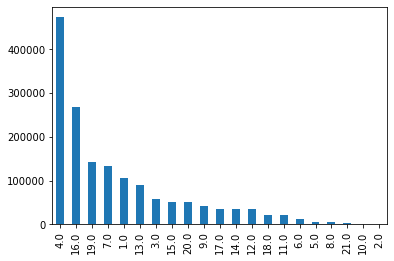

In [62]:
bar_1=df_high_activity_customer['department_id'].value_counts().plot.bar()

In [64]:
bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_1_department.png'))

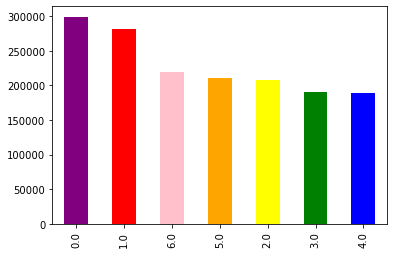

In [65]:
bar_2=df_high_activity_customer['order_dow'].value_counts().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [68]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_2_order_dow.png'))

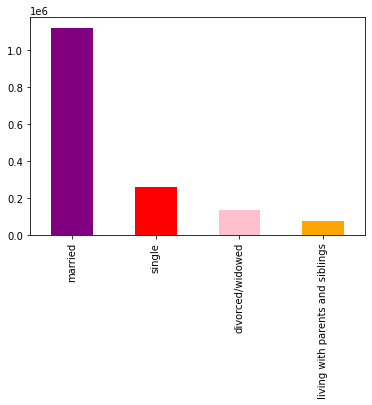

In [67]:
bar_3=df_high_activity_customer['fam_status'].value_counts().plot.bar(color=['purple', 'red', 'pink', 'orange'])

In [69]:
bar_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_3_fam_status.png'))

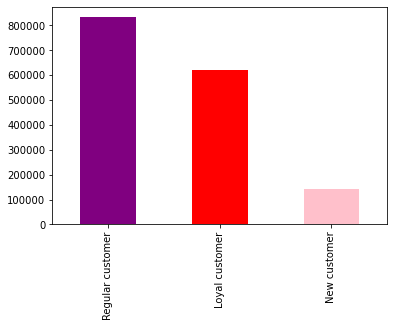

In [70]:
bar_4=df_high_activity_customer['loyalty_flag'].value_counts().plot.bar(color=['purple', 'red', 'pink'])

In [71]:
bar_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_4_loyalty_flag.png'))

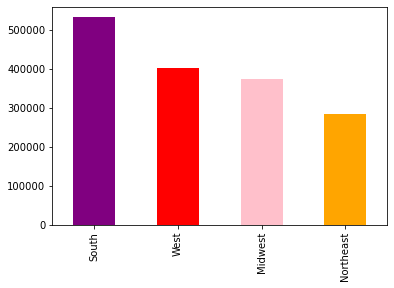

In [72]:
bar_5=df_high_activity_customer['region'].value_counts().plot.bar(color=['purple', 'red', 'pink', 'orange'])

In [73]:
bar_5.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_5_region.png'))

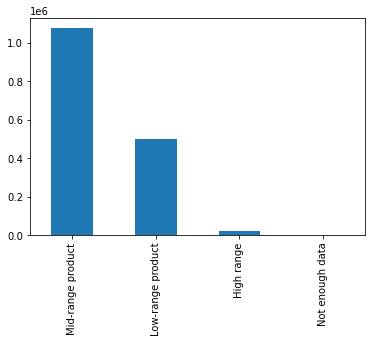

In [74]:
bar_6=df_high_activity_customer['price_range'].value_counts().plot.bar()

In [75]:
bar_6.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_6_price_range.png'))

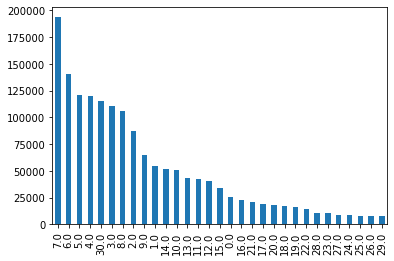

In [76]:
bar_7=df_high_activity_customer['days_since_prior_order'].value_counts().plot.bar()

In [77]:
bar_7.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_7_days_since_prior_order.png'))

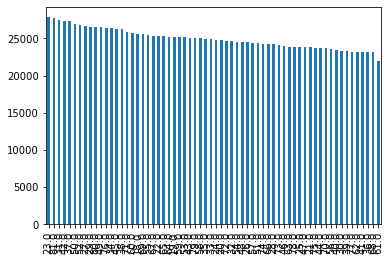

In [78]:
bar_8=df_high_activity_customer['age'].value_counts().plot.bar()

In [79]:
bar_8.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_8_age.png'))

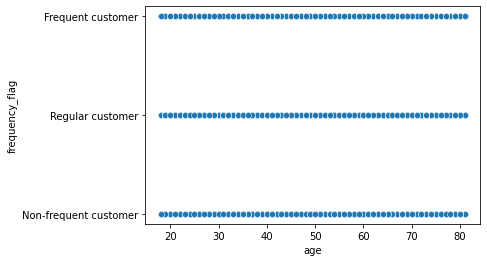

In [80]:
sns_1_age_frequency_flag=sns.scatterplot(x = 'age', y = 'frequency_flag',data = df_high_activity_customer)

In [82]:
sns_1_age_frequency_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'sns_1_age_frequency_flag.png'))

## 7. Step

In [83]:
df_high_activity_customer.groupby('frequency_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                            mean  min      max
frequency_flag                                
Frequent customer      10.435567  1.0  99999.0
Non-frequent customer  13.790243  1.0  99999.0
Regular customer       10.470842  1.0  99999.0

In [84]:
df_high_activity_customer.groupby('spending_flag').agg({'order_number': ['mean', 'min', 'max']})

order_number           
                      mean  min   max
spending_flag                        
High spender     17.303623  5.0  99.0
Low spender      22.045311  5.0  99.0

In [85]:
df_high_activity_customer.groupby('department_id').agg({'income': ['mean', 'min', 'max']})

income                   
                        mean      min       max
department_id                                  
1.0            100882.609199  26070.0  593901.0
2.0            100880.088966  27092.0  573849.0
3.0            101762.064465  26234.0  593901.0
4.0            100011.352850  26061.0  593901.0
5.0            108257.235427  26605.0  553569.0
6.0            101824.699135  26141.0  593901.0
7.0             97171.452686  26116.0  593901.0
8.0            101190.357051  26605.0  494222.0
9.0            102482.513616  26070.0  593901.0
10.0            94477.727969  27558.0  323796.0
11.0            99614.238380  26116.0  569253.0
12.0           104198.592665  26348.0  593901.0
13.0           100766.980701  26024.0  593901.0
14.0            98323.024145  26116.0  593901.0
15.0           102478.703862  26116.0  593901.0
16.0           100395.574892  26061.0  593901.0
17.0           101306.435918  26116.0  593901.0
18.0           101074.313308  26304.0  540828.0
19.0            92240.693026  26116.0  593901.0
20.0            99749.255528  26137.0  577728.0
21.0            99890.742787  26439.0  556641.0

In [86]:
df_high_activity_customer.groupby('department_id').agg({'prices': ['mean', 'min', 'max']})

prices              
                    mean  min      max
department_id                         
1.0             7.741411  1.0     15.0
2.0             7.090468  1.1     15.0
3.0             7.882689  1.0     15.0
4.0             7.965775  1.0     15.0
5.0             8.252854  1.0     15.0
6.0             7.664898  1.1     15.0
7.0             7.698278  1.0     15.0
8.0             7.806688  1.1     15.0
9.0             7.354462  1.0     15.0
10.0            8.300493  1.4     14.1
11.0            8.012769  1.0     15.0
12.0           16.331458  8.0     25.0
13.0            7.999744  1.0     20.0
14.0            8.010923  1.0     14.9
15.0            7.569092  1.0     15.0
16.0           25.441248  1.0  99999.0
17.0            7.343027  1.0     15.0
18.0            7.579724  1.0     15.0
19.0            4.269632  1.6      7.0
20.0            7.817254  1.0     15.0
21.0            8.646217  1.0     15.0

In [87]:
df_high_activity_customer.groupby('fam_status').agg({'income': ['mean', 'min', 'max']})

income                   
                                           mean      min       max
fam_status                                                        
divorced/widowed                  115919.404887  29011.0  576876.0
living with parents and siblings   70513.067651  26024.0  340197.0
married                           101535.818972  26116.0  593901.0
single                             91417.897119  26061.0  569810.0

In [88]:
df_high_activity_customer.groupby('fam_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                                       mean  min      max
fam_status                                               
divorced/widowed                  10.738175  1.0  99999.0
living with parents and siblings  10.229995  1.0  99999.0
married                           10.921543  1.0  99999.0
single                             9.595139  1.0  14900.0

## 8. Step

In [89]:
df_high_activity_customer.groupby('region').agg({'income': ['mean', 'min', 'max']})

income                   
                    mean      min       max
region                                     
Midwest    100015.721373  26234.0  569253.0
Northeast  100369.252987  26256.0  576876.0
South       98819.637935  26061.0  577728.0
West        99613.310105  26024.0  593901.0

In [ ]:
# The mean income of the customers at Northeast are the highest. 
# But as we`ve already seen at bar_5, the customers at Northeast has the lowest activity at Instacart. 

In [90]:
df_high_activity_customer.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest     9.771271  1.0  99999.0
Northeast  10.199930  1.0  99999.0
South      11.924462  1.0  99999.0
West       10.120877  1.0  99999.0

In [93]:
# Mean price of the products which are bought by the customers from South are the highest. 

In [91]:
df_high_activity_customer.groupby('region')['fam_status'].value_counts(dropna=False)

region     fam_status                      
Midwest    married                             259777
           single                               64810
           divorced/widowed                     31086
           living with parents and siblings     18056
Northeast  married                             202015
           single                               44382
           divorced/widowed                     27359
           living with parents and siblings     11741
South      married                             373251
           single                               87150
           divorced/widowed                     44144
           living with parents and siblings     28638
West       married                             287775
           single                               64590
           divorced/widowed                     32177
           living with parents and siblings     19731
Name: fam_status, dtype: int64

In [94]:
# Married people from the whole USA purchase more than the others at Instacart. 

In [92]:
df_high_activity_customer.groupby('region')['price_range'].value_counts(dropna=False)

region     price_range      
Midwest    Mid-range product    251584
           Low-range product    117074
           High range             4722
           Not enough data         349
Northeast  Mid-range product    192276
           Low-range product     89402
           High range             3563
           Not enough data         256
South      Mid-range product    359166
           Low-range product    166740
           High range             6777
           Not enough data         500
West       Mid-range product    272380
           Low-range product    126385
           High range             5127
           Not enough data         381
Name: price_range, dtype: int64

In [95]:
# As we`ve already seen at bar_6, mid-range products have the highest number of orders. 

## 9. Step

In [96]:
# I`ve already prepared the charts and visualisation and exported them to the file at Step-6.

## 10. Step

In [97]:
df_high_activity_customer.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'lastmerged_high_activity_customer.pkl'))